# 파이썬 머신러닝 판다스 데이터분석
## Part 5. 데이터 사전처리

In [6]:
import pandas as pd
import numpy as np

In [7]:
# 예제 5-1
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [8]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [9]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [10]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [11]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


![dropna image](images/dropna.jpg)

In [12]:
# 예제 5-2
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
print(missing_df)

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

In [13]:
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악
    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력
        
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [14]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

714


In [2]:
# 예제 5-3
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [3]:
# 예제 5-4
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [4]:
df['embark_town'].value_counts(dropna=True)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [5]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

Southampton




In [19]:
df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [20]:
# 예제 5-5
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [21]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [22]:
# 예제 5-6
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool


0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [23]:
# 예제 5-7
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [24]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [25]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


In [ ]:
# 예제 5-8
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    
print('\n')

In [ ]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))    
print('\n')

# kpl 열을 소수점 아래 둘째 자리에서 반올림 
df['kpl'] = df['kpl'].round(2)
print(df.head(3))     

In [ ]:
# 예제 5-9
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 각 열의 자료형 확인
print(df.dtypes)   
print('\n')

In [ ]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique())
print('\n')

In [ ]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  
print('\n')

In [ ]:
# origin 열의 고유값 확인
print(df['origin'].unique())
# 정수형 데이터를 문자형 데이터로 변환 
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

# origin 열의 고유값과 자료형 확인
print(df['origin'].unique())
print(df['origin'].dtypes) 
print('\n')

In [ ]:
# origin 열의 문자열 자료형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')     
print(df['origin'].dtypes) 

# 범주형을 문자열로 다시 변환
df['origin'] = df['origin'].astype('str')     
print(df['origin'].dtypes)

In [ ]:
# model year 열의 정수형을 범주형으로 변환
print(df['model year'].sample(3))
df['model year'] = df['model year'].astype('category') 
print(df['model year'].sample(3)) 

## 구간분할
### 연속형 데이터를 그대로 사용하지 않고 일정 구간(bin)으로 나눠서 분석하려는 경우
### (1) 연속형 변수의 값을 일정구간으로 나눈다.   ---> np.histogram()
### (2) 각 구간을 범주형 이산 변수로 변환한다.  ---> pd.cut()

In [28]:
# 예제 5-10
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)
print(count)

[ 46.         107.33333333 168.66666667 230.        ]
[257 103  32]


In [27]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(df[['horsepower', 'hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


## 더미변수
### 범주형 데이터를 회귀분석 등 머신러닝 알고리즘에 사용하기 위해서 0과 1로 구성된 
### 숫자값으로 변환한 변수
#### 0과 1은 수의 대소 관계를 나타내지 않고 어떠한 특성의 존재 여부만 나타낸다.
#### 해당 특성이 존재하면 1, 존재하지 않으면 0으로 구분한다.
![더미](images/dummy1.png)

In [29]:
# 예제 5-11
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))


    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


In [30]:
# 예제 5-12
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# sklern 라이브러리 불러오기
from sklearn import preprocessing    

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
print(onehot_labeled)
print(type(onehot_labeled))

# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1) 
print(onehot_reshaped)
print(type(onehot_reshaped))

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


## 희소행렬
### 희소행렬(sparse matrix)은 행렬의 값이 대부분 0인 경우를 가리키는 표현이다. 

![희소행렬1](images/sparsem1.png)
![희소행렬2](images/sparsem2.png)
***

In [11]:
# 예제 5-13
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())
print('\n')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs(df.horsepower.max()) 

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [12]:
# 예제 5-14 - 0~1 사이의 값으로 정규화
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)과 최소값(min)을 확인
print(df.horsepower.describe())
print('\n')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64


count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


In [13]:
# 예제 5-15
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('data/stock-data.csv')

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None
         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-0

In [14]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정. 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date', axis=1, inplace=True)

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


In [15]:
# 예제 5-16
# 라이브러리 불러오기
import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
print(type(dates[0]))
print('\n')
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)   
print(ts_dates)
print(type(ts_dates[0]))
print('\n')

# Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='A')
print(pr_year)
print(type(pr_year[0]))

<class 'str'>


DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')
<class 'pandas._libs.tslibs.period.Period'>


In [37]:
# 예제 5-17
# 라이브러리 불러오기
import pandas as pd

# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)
print('\n')

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')




In [49]:
pd.date_range(start='2021-10-01',    # 날짜 범위의 시작
                   end='2021-10-31',                 # 날짜 범위의 끝
                   freq='D',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')  

DatetimeIndex(['2021-10-01 00:00:00+09:00', '2021-10-02 00:00:00+09:00',
               '2021-10-03 00:00:00+09:00', '2021-10-04 00:00:00+09:00',
               '2021-10-05 00:00:00+09:00', '2021-10-06 00:00:00+09:00',
               '2021-10-07 00:00:00+09:00', '2021-10-08 00:00:00+09:00',
               '2021-10-09 00:00:00+09:00', '2021-10-10 00:00:00+09:00',
               '2021-10-11 00:00:00+09:00', '2021-10-12 00:00:00+09:00',
               '2021-10-13 00:00:00+09:00', '2021-10-14 00:00:00+09:00',
               '2021-10-15 00:00:00+09:00', '2021-10-16 00:00:00+09:00',
               '2021-10-17 00:00:00+09:00', '2021-10-18 00:00:00+09:00',
               '2021-10-19 00:00:00+09:00', '2021-10-20 00:00:00+09:00',
               '2021-10-21 00:00:00+09:00', '2021-10-22 00:00:00+09:00',
               '2021-10-23 00:00:00+09:00', '2021-10-24 00:00:00+09:00',
               '2021-10-25 00:00:00+09:00', '2021-10-26 00:00:00+09:00',
               '2021-10-27 00:00:00+09:00', '2021-1

In [51]:
pd.date_range(start='2021-10-01',    # 날짜 범위의 시작
                   end='2021-10-31',                 # 날짜 범위의 끝
                   freq='B',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')  

DatetimeIndex(['2021-10-01 00:00:00+09:00', '2021-10-04 00:00:00+09:00',
               '2021-10-05 00:00:00+09:00', '2021-10-06 00:00:00+09:00',
               '2021-10-07 00:00:00+09:00', '2021-10-08 00:00:00+09:00',
               '2021-10-11 00:00:00+09:00', '2021-10-12 00:00:00+09:00',
               '2021-10-13 00:00:00+09:00', '2021-10-14 00:00:00+09:00',
               '2021-10-15 00:00:00+09:00', '2021-10-18 00:00:00+09:00',
               '2021-10-19 00:00:00+09:00', '2021-10-20 00:00:00+09:00',
               '2021-10-21 00:00:00+09:00', '2021-10-22 00:00:00+09:00',
               '2021-10-25 00:00:00+09:00', '2021-10-26 00:00:00+09:00',
               '2021-10-27 00:00:00+09:00', '2021-10-28 00:00:00+09:00',
               '2021-10-29 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='B')

In [53]:
pd.date_range(start='2021-10-01',    # 날짜 범위의 시작
                   periods=6,                 # 날짜 범위의 끝
                   freq='3H',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')  

DatetimeIndex(['2021-10-01 00:00:00+09:00', '2021-10-01 03:00:00+09:00',
               '2021-10-01 06:00:00+09:00', '2021-10-01 09:00:00+09:00',
               '2021-10-01 12:00:00+09:00', '2021-10-01 15:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3H')

In [17]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print('\n')

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')




In [18]:
# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [19]:
# 예제 5-18
# 라이브러리 불러오기
import pandas as pd

# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)
print('\n')

# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print('\n')

# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
print(pr_2h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


In [20]:
# 예제 5-19
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
print(df.head())
print('\n')

# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())
print('\n')
print(type(df['new_Date'][0]))
print(df['new_Date'].dt)
print('\n')


# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
print(df.head())
print('\n')

# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
print(df.head())


         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  1085

In [1]:
# 예제 5-20
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

print(df.head())
print('\n')
print(df.index)
print('\n')

# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df.loc['2018']
print(df_y.head())
print('\n')
df_ym = df.loc['2018-07']    # loc 인덱서 활용
print(df_ym)
print('\n')
df_ym_cols = df.loc['2018-07-02', 'Start':'High']    # 열 범위 슬라이싱
print(df_ym_cols)
print('\n')
df_ymd = df.loc['2018-07-02']
print(df_ymd)
print('\n')
df_ymd_range = df['2018-06-25':'2018-06-20']    # 날짜 범위 지정
print(df_ymd_range)
print('\n')

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)


                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900

In [4]:
today = df.index


In [5]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
print(type(today))
df['time_delta'] = today - df.index             # 날짜 차이 계산

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df.set_index('time_delta', inplace=True)        # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)

                  Date  Close  Start   High    Low  Volume
time_delta                                                
180 days    2018-06-28  10400  10900  10950  10150  155769
181 days    2018-06-27  10900  10800  11050  10500  133548
182 days    2018-06-26  10800  10900  11000  10700   63039
183 days    2018-06-25  11150  11400  11450  11000   55519
186 days    2018-06-22  11300  11250  11450  10750  134805
187 days    2018-06-21  11200  11350  11750  11200  133002
188 days    2018-06-20  11550  11200  11600  10900  308596
189 days    2018-06-19  11300  11850  11950  11300  180656


In [7]:
dd = pd.to_datetime('2021-01-04')
print(dd.year)
print(dd.month)
print(dd.day)
print(dd.hour)
print(dd.days_in_month)
print(dd.dayofweek)
print(dd.dayofyear)

2021
1
4
0
31
0
4


In [8]:
print(pd.to_datetime('2021-01-10'))
print(pd.to_datetime('20210110'))
print(pd.to_datetime('01102021', format='%m%d%Y'))

2021-01-10 00:00:00
2021-01-10 00:00:00
2021-01-10 00:00:00


In [9]:
print(pd.to_datetime('2021-01-10T13:30'))
print(pd.to_datetime('2021-01-10 13:30'))
print(pd.to_datetime('202101101330'))
print(pd.to_datetime('2021-01-10 13-30', format='%Y-%m-%d %H-%M'))

2021-01-10 13:30:00
2021-01-10 13:30:00
2021-01-10 13:30:00
2021-01-10 13:30:00


In [17]:
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [18]:
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date']) 
df.set_index('new_Date', inplace=True)
df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


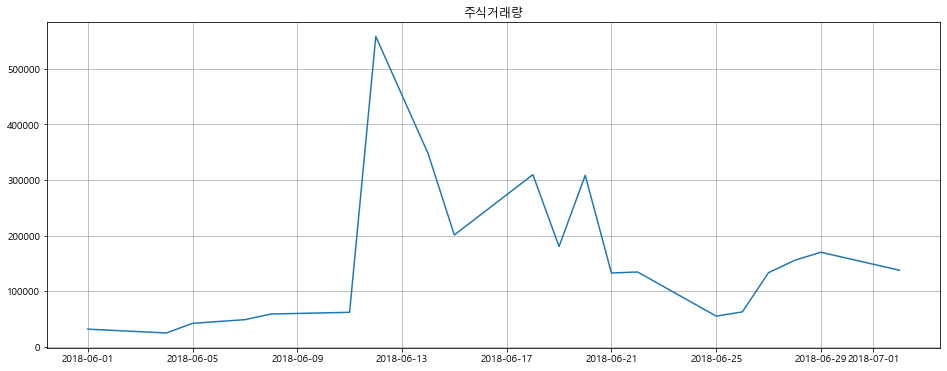

In [20]:
plt.figure(figsize=(16,6))
plt.plot(df['Volume'])
plt.grid()
plt.title('주식거래량')
plt.show()

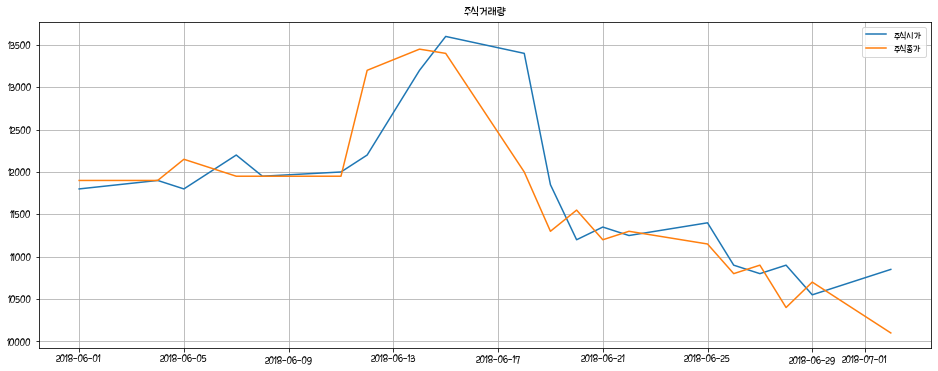

In [65]:
plt.figure(figsize=(16,6))
plt.plot(df['Start'],label="주식시가")
plt.plot(df['Close'],label="주식종가")
plt.grid()
plt.legend()
plt.title('주식거래량')
plt.show()

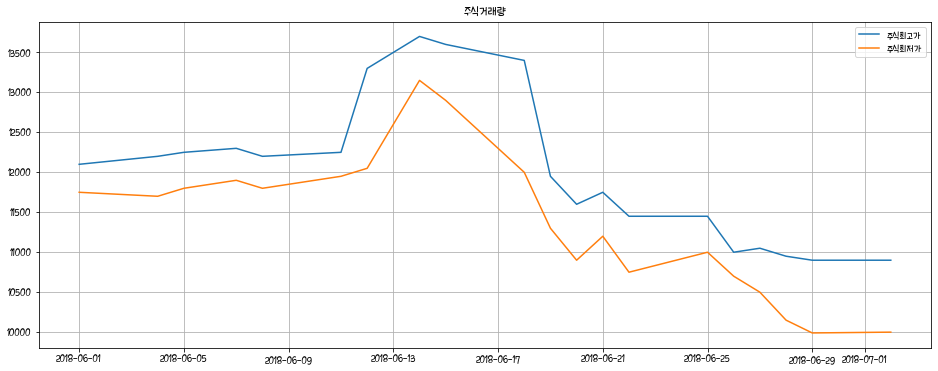

In [66]:
plt.figure(figsize=(16,6))
plt.plot(df['High'],label="주식최고가")
plt.plot(df['Low'],label="주식최저가")
plt.grid()
plt.legend()
plt.title('주식거래량')
plt.show()

In [67]:
display(df)

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [76]:
df.loc['2018-06-19':'2018-06-28']

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [79]:
from datetime import datetime
df.loc[datetime(2018, 6, 19):datetime(2018, 6, 28)]

,Close,Start,High,Low,Volume
new_Date,,,,,


In [69]:
df1 = df['2018-06-19':'2018-06-28']
df2 = df1[['Close', 'Start', 'High', 'Low']]
display(df2)

,Close,Start,High,Low
new_Date,,,,
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700
2018-06-25,11150,11400,11450,11000
2018-06-22,11300,11250,11450,10750
2018-06-21,11200,11350,11750,11200
2018-06-20,11550,11200,11600,10900


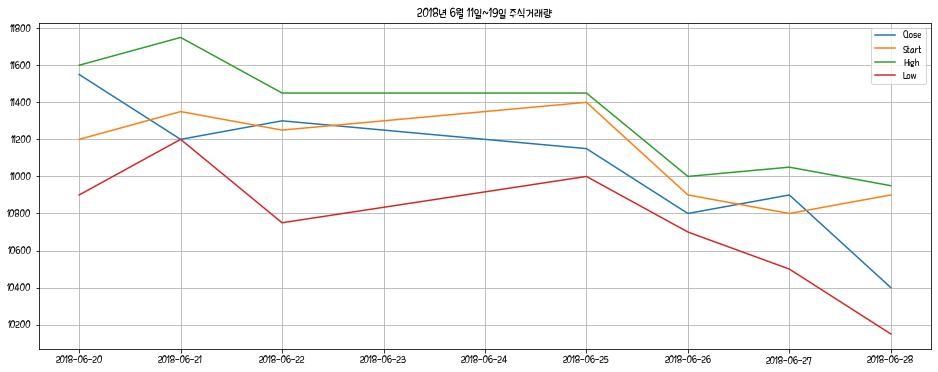

In [46]:
plt.figure(figsize=(16,6))
plt.plot(df2)
plt.grid()
plt.legend(['Close', 'Start', 'High', 'Low'])
plt.title('2018년 6월 11일~19일 주식거래량')
plt.show()